# Funciones de distribución de probabilidad

## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
a = 1
b = 100
n = 1000000 #la muestra
data = np.random.uniform(a, b, n)

(array([100069., 100262.,  99880.,  99289., 100373., 100160.,  99749.,
         99676., 100350., 100192.]),
 array([ 1.00002241, 10.90000874, 20.79999507, 30.69998141, 40.59996774,
        50.49995408, 60.39994041, 70.29992675, 80.19991308, 90.09989941,
        99.99988575]),
 <a list of 10 Patch objects>)

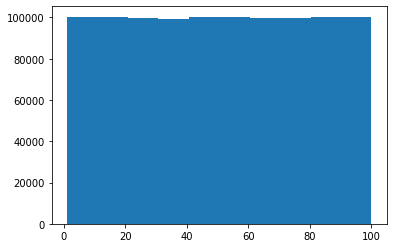

In [12]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [17]:
data = np.random.randn(1000000)

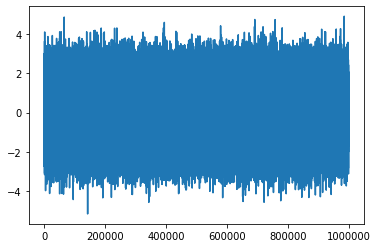

In [18]:
x = range(1,1000001)
plt.plot(x, data)

(array([2.10000e+01, 6.87000e+02, 1.50280e+04, 1.11226e+05, 3.22159e+05,
        3.62960e+05, 1.59284e+05, 2.67960e+04, 1.79200e+03, 4.70000e+01]),
 array([-5.18426401, -4.17289228, -3.16152055, -2.15014882, -1.13877709,
        -0.12740535,  0.88396638,  1.89533811,  2.90670984,  3.91808157,
         4.9294533 ]),
 <a list of 10 Patch objects>)

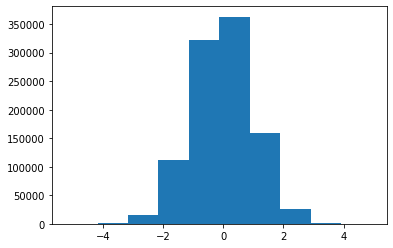

In [19]:
plt.hist(data)

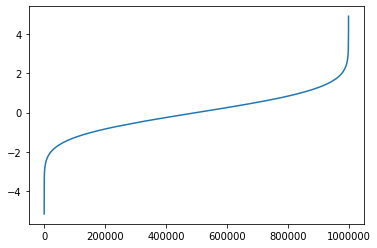

In [20]:
plt.plot(x, sorted(data)) #dibujarlo organizado

(array([  12.,   98.,  484., 1341., 2482., 2829., 1830.,  723.,  169.,
          32.]),
 array([-3.88743116, -2.07573754, -0.26404393,  1.54764969,  3.3593433 ,
         5.17103691,  6.98273053,  8.79442414, 10.60611776, 12.41781137,
        14.22950499]),
 <a list of 10 Patch objects>)

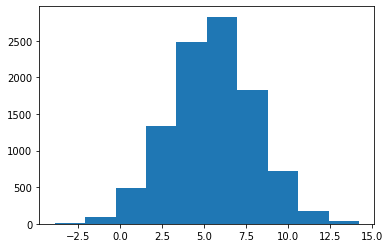

In [23]:
mu = 5.5
sd = 2.5
Z = np.random.randn(10000)
data = mu + sd * Z #Z = (X - mu) / sd -> N(0,1), x = mu + sd * Z (Z es la normal estándar)
plt.hist(data)

In [25]:
data = np.random.randn(2,4) #2 colleciones de 4 elementos cada una
data

array([[ 2.10035012,  0.40396987, -0.35074644, -0.31727348],
       [-1.18286799, -1.31627102,  0.37669902, -1.64460187]])

## La simulación de Monte Carlo 

* Generamos dos números aleatorios x e y entre 0 y 1, en total 1000 veces
* calcularemos xx + yy
    * si el valor es inferior a 1 --> estamos dentro del círculo
    * si el calor es superior a 1 --> estamos fuera del círculo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo. 
* Usamos dicha probabilidad para aproximar el valor de Pi.
* Repetimos el experimento un número suficiente de veces por ej 100, para obtener 100 diferentes aproximaciones de Pi.
* Calculamos el promedio de los 10000 experimentos anteriores para dar un valor final a Pi.

In [44]:
#Se generan 1000 puntos que pueden estar dentro o fuera del círdulo y  lo repito 100 veces
def pi_montecarlo(n, num_exp):
    pi_avg = 0   
    pi_value_list = []
    for i in range(num_exp): # promedio de 100 valores
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/num_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.141373999999999


(3.141373999999999, [<matplotlib.lines.Line2D at 0x15f6c0cc648>])

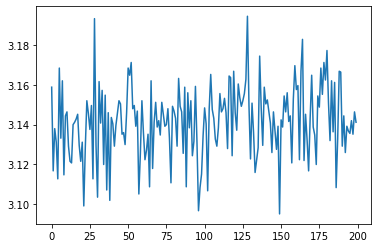

In [45]:
pi_montecarlo(10000, 200)

## Dummy Data Sets

In [2]:
data = pd.DataFrame(
    {
        'A' : np.random.randn(10),
        'B' : 1.5 + 2.5 * np.random.randn(10), #media, desviación estándar, tamaño 10 igual que la línea anterior
        'C' : np.random.uniform(5, 32, 10) # valores entre 5 y 32 con tamaño 10
    }
)
data

A         B          C
0 -1.321326 -0.674464  12.787370
1  1.561505  2.663340  21.491295
2 -1.070962  3.939774  17.841875
3  1.277833  5.573290  15.618570
4 -0.399028 -0.364075  23.773861
5 -0.048679 -3.400047   6.663765
6 -0.575777 -0.800938  22.304238
7  0.261022  6.032656   5.826808
8 -0.421343  0.212474  13.566975
9  1.253174  5.057346  25.147031

In [3]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n) 
    }
)
data.head()

A         B          C
0  0.384095  1.809144  20.574164
1  0.321368  2.023427  23.116321
2  0.031583 -0.957486  20.210145
3  1.182917  0.858877  20.775964
4  0.532373 -0.495517  23.730294

In [5]:
data.describe()

A               B               C
count  1000000.000000  1000000.000000  1000000.000000
mean         0.001260        1.498187       18.510167
std          1.001104        2.499877        7.793870
min         -5.481615      -10.169858        5.000039
25%         -0.674159       -0.187144       11.766501
50%          0.000440        1.496640       18.509633
75%          0.677215        3.185809       25.270406
max          4.744256       13.314940       31.999976

(array([5.00000e+00, 2.59000e+02, 7.49500e+03, 7.46100e+04, 2.73727e+05,
        3.86439e+05, 2.10290e+05, 4.35840e+04, 3.51100e+03, 8.00000e+01]),
 array([-5.48161503, -4.45902788, -3.43644074, -2.41385359, -1.39126645,
        -0.3686793 ,  0.65390784,  1.67649499,  2.69908213,  3.72166928,
         4.74425642]),
 <a list of 10 Patch objects>)

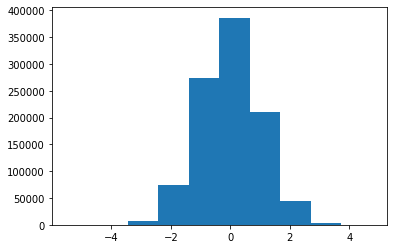

In [7]:
plt.hist(data['A'])

(array([9.70000e+01, 2.53400e+03, 2.96280e+04, 1.49000e+05, 3.30898e+05,
        3.21602e+05, 1.38174e+05, 2.58140e+04, 2.18900e+03, 6.40000e+01]),
 array([-10.16985785,  -7.82137802,  -5.4728982 ,  -3.12441837,
         -0.77593855,   1.57254128,   3.92102111,   6.26950093,
          8.61798076,  10.96646058,  13.31494041]),
 <a list of 10 Patch objects>)

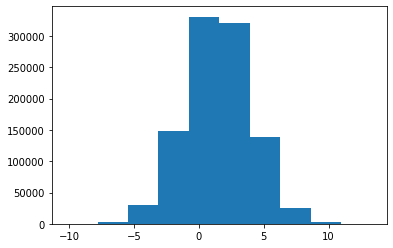

In [8]:
plt.hist(data['B'])

(array([ 99765.,  99786.,  99772., 100130., 100200.,  99888., 100064.,
        100030., 100222., 100143.]),
 array([ 5.00003863,  7.70003237, 10.40002611, 13.10001985, 15.80001359,
        18.50000733, 21.20000107, 23.89999481, 26.59998855, 29.29998229,
        31.99997603]),
 <a list of 10 Patch objects>)

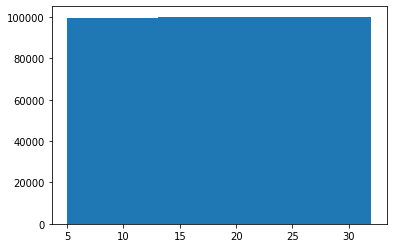

In [9]:
plt.hist(data['C'])

In [11]:
data = pd.read_csv("D:\\Machine Learning\\python-ml-course-master\\datasets\\customer-churn-model\\Customer Churn Model.txt")
data.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

In [12]:
column_names = data.columns.values.tolist()
a = len(column_names)
a

21

In [15]:
new_data = pd.DataFrame(
    {
        'Column Name' : column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42,42+a) #normamente empieza en 0 acá le doy el valor desde el cual quiero que empiece
)
new_data

Column Name         A         B
42           State -0.687358  0.664089
43  Account Length  1.254130  0.180354
44       Area Code -2.354587  0.824328
45           Phone -0.570609  0.828507
46      Int'l Plan -0.526421  0.981369
47      VMail Plan  0.851264  0.889226
48   VMail Message  0.791326  0.037421
49        Day Mins -0.074773  0.656951
50       Day Calls  0.749902  0.450108
51      Day Charge  0.148692  0.930835
52        Eve Mins  1.353447  0.849727
53       Eve Calls  1.653111  0.934468
54      Eve Charge  0.073661  0.847137
55      Night Mins -1.280679  0.159510
56     Night Calls -0.158948  0.957852
57    Night Charge  0.699496  0.140949
58       Intl Mins  0.000624  0.541262
59      Intl Calls  1.047123  0.836070
60     Intl Charge -0.998646  0.734261
61  CustServ Calls -0.250563  0.456840
62          Churn? -1.989215  0.472431